### Pull Tract-Level and County-Level ACS 5-year data using Census library and API

In [1]:
import os
if 'COLAB_GPU' in os.environ:
    from google.colab import  drive
    drive.mount('/drive')
    data_path = '/drive/Shared drives/Capstone/notebooks/data'
else:
    data_path = 'data'

In [2]:

#Used this notebook as inspiration: 
#https://github.com/BuzzFeedNews/2020-02-gentrification/blob/master/notebooks/01-download-census-data.ipynb. 


In [3]:
# Dependencies

import pandas as pd
import numpy as np
import requests
from census import Census
from us import states

### Pull Census 5-year data and select variables

In [4]:
c = Census('307a9c458f89f32c9cf817fb1ae4f426ccc84e2c')
#This is the key to use the API. It was obtained at https://api.census.gov/data/key_signup.html


In [5]:
#List of variables available at https://api.census.gov/data/2019/acs/acs1/variables.html 

rename_dict = {
     'NAME': 'name',
     'B01001_001E': "population",
     'B02001_002E': "white", # for all races chose people who identified only as that race B01001A_001E
     'B02001_003E': "black",
     'B02001_004E': "native_american",
     'B02001_005E': "asian",
     'B02001_006E': "hawaiian",
     'B02001_007E': "some_other_race_alone",
     'B02001_008E': "two_more_races",
     'B03002_012E': "hispanic_or_latino", 
     'B01001_004E': 'male_5_9',
     'B01001_005E': 'male_10_14',
     'B01001_006E': 'male_15_17',
     'B01001_028E': 'female_5_9',
     'B01001_029E': 'female_10_14',
     'B01001_030E': 'female_15_17',
     'B01001_011E': "male_25_29",
     'B01001_012E': "male_30_34",
     'B01001_013E': 'male_35_39',
     'B01001_014E': 'male_40_44',
     'B01001_015E': 'male_45_49',
     'B01001_016E': "male_50_54",
     'B01001_035E': "female_25_29",
     'B01001_036E': "female_30_34",
     'B01001_037E': 'female_35_39',
     'B01001_038E': 'female_40_44',
     'B01001_039E': 'female_45_49',
     'B01001_040E': "female_50_54",
     'B23001_003E': 'male_16_19',
     'B23001_007E': 'male_16_19_labor_force_employed',
     'B23001_010E': 'male_20_21',
     'B23001_014E': 'male_20_21_labor_force_employed',
     'B23001_017E': 'male_22_24', 
     'B23001_021E': 'male_22_24_labor_force_employed',
     'B23001_089E': 'female_16_19',
     'B23001_093E': 'female_16_19_labor_force_employed',
     'B23001_096E': 'female_20_21',
     'B23001_100E': 'female_20_21_labor_force_employed',
     'B23001_103E': 'female_22_24', 
     'B23001_107E': 'female_22_24_labor_force_employed',
     'B23001_138E': 'female_55_59',
     'B23001_142E': 'female_55_59_labor_force_employed',
     'B23001_145E': 'female_60_61', 
     'B23001_149E': 'female_60_61_labor_force_employed',
     'B23001_152E': 'female_62_64', 
     'B23001_156E':  'female_62_64_labor_force_employed',
     'B23001_052E': 'male_55_59',
     'B23001_056E': 'male_55_59_labor_force_employed',
     'B23001_059E': 'male_60_61', 
     'B23001_063E': 'male_60_61_labor_force_employed',
     'B23001_066E': 'male_62_64', 
     'B23001_070E': 'male_62_64_labor_force_employed',
     'B23001_028E':'male_25_29_labor_force_employed',
     'B23001_035E':'male_30_34_labor_force_employed',
     'B23001_042E':'male_35_44_labor_force_employed',
     'B23001_042E':'male_35_44_labor_force_employed',
     'B23001_049E':'male_45_54_labor_force_employed',
     'B23001_114E':'female_25_29_labor_force_employed', #Total:!!Female:!!25 to 29 years:!!In labor force:!!Civilian:!!Employed
     'B23001_121E':'female_30_34_labor_force_employed',
     'B23001_128E':'female_35_44_labor_force_employed',
     'B23001_135E':'female_45_54_labor_force_employed',
     'C23002A_003E': 'white_male_16_64',
     'C23002A_007E': 'white_male_16_64_employed',
     'C23002A_016E': 'white_female_16_64',
     'C23002A_020E': 'white_female_16_64_employed',
     'C23002B_003E': 'black_male_16_64',
     'C23002B_007E': 'black_male_16_64_employed',
     'C23002B_016E': 'black_female_16_64',
     'C23002B_020E': 'black_female_16_64_employed',     
     'C23002C_003E': 'american_indian_male_16_64',
     'C23002C_007E': 'american_indian_male_16_64_employed',
     'C23002C_016E': 'american_indian_female_16_64',
     'C23002C_020E': 'american_indian_female_16_64_employed',
     'C23002D_003E': 'asian_male_16_64',
     'C23002D_007E': 'asian_male_16_64_employed',
     'C23002D_016E': 'asian_female_16_64',
     'C23002D_020E': 'asian_female_16_64_employed',
     'C23002F_003E': 'some_other_race_alone_male_16_64',
     'C23002F_007E': 'some_other_race_alone_male_16_64_employed',
     'C23002F_016E': 'some_other_race_alone_female_16_64',
     'C23002F_020E': 'some_other_race_alone_female_16_64_employed',
     'C23002G_003E': 'two_or_more_race_male_16_64',
     'C23002G_007E': 'two_or_more_race_male_16_64_employed',
     'C23002G_016E': 'two_or_more_race_female_16_64',
     'C23002G_020E': 'two_or_more_race_female_16_64_employed',
     'C23002I_003E': 'hispanic_or_latino_male_16_64',
     'C23002I_007E': 'hispanic_or_latino_male_16_64_employed',
     'C23002I_016E': 'hispanic_or_latino_female_16_64',
     'C23002I_020E': 'hispanic_or_latino_female_16_64_employed',
     'B19113_001E': "median_family_income", # MEDIAN FAMILY INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)
     'B19080_001E': "income_20_percentile", ### 20th percentile total household income
     'B19080_004E': "income_80_percentile", ### 80th percentile total household income
     'B19113A_001E':"median_family_income_white", #(WHITE ALONE HOUSEHOLDER)
     'B19113B_001E':"median_family_income_black", #BLACK OR AFRICAN AMERICAN ALONE HOUSEHOLDER
     'B19113C_001E':'median_family_income_indigenous',#AMERICAN INDIAN AND ALASKA NATIVE ALONE HOUSEHOLDER
     'B19113D_001E':'median_family_income_asian', #ASIAN ALONE HOUSEHOLDER
     'B19113H_001E':'median_family_income_white_not_hisp', #WHITE ALONE, NOT HISPANIC OR LATINO HOUSEHOLDER
     'B19113I_001E':"median_family_income_hispanic",#HISPANIC OR LATINO HOUSEHOLDER
     'B01001_027E': 'female_under5',
     'B01001_003E':'male_under5',
     'B01001A_003E':'white_m_under5', 
     'B01001A_018E': 'white_f_under5',
     'B01001B_003E': 'black_m_under5',
     'B01001B_018E':'black_f_under5',
     'B01001C_003E':'indigenous_m_under5', #SEX BY AGE (AMERICAN INDIAN AND ALASKA NATIVE ALONE)
     'B01001C_018E':'indigenous_f_under5', #SEX BY AGE (AMERICAN INDIAN AND ALASKA NATIVE ALONE)
     'B01001D_003E':'asian_m_under5',
     'B01001D_018E':'asian_f_under5',
     'B01001E_003E':'hawaiian_m_under5', 
     'B01001E_018E':'hawaiian_f_under5', #SEX BY AGE (NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE)
     'B01001F_003E':'some_other_race_m_under5',
     'B01001F_018E':'some_other_race_f_under5',
     'B01001G_003E':'two_or_more_race_m_under5',
     'B01001G_018E':'two_or_more_race_f_under5',
     'B01001I_003E':'hispanic_m_under5',
     'B01001I_018E':'hispanic_f_under5',
     'B09001_004E': 'total_3_4', # number of 3 and 4 year olds
     'B14001_003E': 'preschool_enrollment', #Enrolled in nursery school, preschool 3+ - this could include 5 year olds
     'B14007A_003E': 'preschool_enrollment_white',
     'B14007B_003E': 'preschool_enrollment_black',
     'B14007I_003E':'preschool_enrollment_hispanic',
     'B14007C_003E': 'preschool_enrollment_indigenous',
     'B14007D_003E': 'preschool_enrollment_asian',
     'B14003_050E': "fem_not_enrolled_3_4",
     'B14003_022E': "mal_not_enrolled_3_4",
      # https://www.census.gov/topics/income-poverty/poverty/guidance/poverty-measures.html
     'B17001_001E': 'total_poverty', # number of people for whom poverty status exists
     'B17001_002E':'all_in_poverty', # number of people in poverty
     'B17001_031E': 'all_not_poverty', # number of people not in poverty Income in the past 12 months at or above poverty level 
     'B14002_005E': 'male_public_preschool',
     'B14002_008E':'male_public_kinder',
     'B14002_011E': 'male_public_1_4',
     'B14002_014E': 'male_public_5_8',
     'B14002_017E': 'male_public_9_12',
     'B14002_029E': 'female_public_preschool',
     'B14002_032E':'female_public_kinder',
     'B14002_035E': 'female_public_1_4',
     'B14002_038E': 'female_public_5_8',
     'B14002_041E': 'female_public_9_12',
     }

categories = list(rename_dict.keys())



### Voting Eligible population

In [6]:
# https://pypi.org/project/census/ list of geography levels available
#This function pulls county level data for acs 5-year 
# since the voting data is from 2020, we will do a separate data pull from the rest of the variables for the 2020 voting-eligible population


acs_5yr = c.acs5.state_county(
        ['B29001_001E'], #voting age population
        Census.ALL,
        #state_code,
        Census.ALL,
        year = 2020
    )
voting_population = pd.DataFrame(acs_5yr) # this is county-level data for this variable for all counties in the US
voting_population = voting_population.rename(columns={'B29001_001E':'voting_population'})
voting_population.head()

voting_population state county
0            41959.0    01    001
1           167986.0    01    003
2            19468.0    01    005
3            17583.0    01    007
4            42978.0    01    009

### Tract-level data

In [7]:
rename_dict_tracts = {
     'NAME': 'name',
     'B01001_001E': "population",
     'B17001_001E': 'total_poverty', # number of people for whome poverty status exists
     'B17001_002E':'all_in_poverty', # number of people in poverty
     'B17001_031E': 'all_not_poverty', # number of people not in poverty Income in the past 12 months at or above poverty level
     'B02001_002E': "white", # for all races chose people who identified only as that race B01001A_001E
     'B02001_003E': "black",
     'B02001_004E': "native_american",
     'B02001_005E': "asian",
     'B02001_006E': "hawaiian",
     'B02001_007E': "some_other_race_alone",
     'B02001_008E': "two_more_races",
     'B03002_012E': "hispanic_or_latino", 
}

categories_tracts = list(rename_dict_tracts.keys())


In [8]:
state_fips = ['01', '02', '04', '05', '06', '08', '09', '10', '12', '13', '15', '16', '17',
              '18', '19', '20', '21', '22','23','24', '25', '26','27','28','29','30','31',
              '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '44', '45',
              '46', '47', '48', '49', '50', '51', '53', '54', '55', '56', '60', '66', '69',
              '72', '78']


In [9]:
timeperiod = 2019
us_tract_df = pd.DataFrame()

for fips in state_fips:
    acs_5yr = c.acs5.state_county_tract(
        categories_tracts,
        fips, 
        Census.ALL, 
        Census.ALL,
        year = timeperiod
    )
    df = pd.DataFrame(acs_5yr)

    df = df.rename(columns=rename_dict_tracts)
    df['year'] = timeperiod

    # Concatenate
    us_tract_df = pd.concat([us_tract_df,df], ignore_index=True)


us_tract_df.head()



name  population  total_poverty  \
0     Census Tract 11, Jefferson County, Alabama      4781.0         4655.0   
1     Census Tract 14, Jefferson County, Alabama      1946.0         1946.0   
2     Census Tract 20, Jefferson County, Alabama      4080.0         4007.0   
3  Census Tract 38.02, Jefferson County, Alabama      5291.0         5291.0   
4     Census Tract 40, Jefferson County, Alabama      2533.0         2533.0   

   all_in_poverty  all_not_poverty   white   black  native_american  asian  \
0           700.0           3955.0    94.0  4629.0             58.0    0.0   
1           548.0           1398.0     4.0  1784.0              0.0    0.0   
2          2057.0           1950.0  1356.0  2604.0              0.0    0.0   
3          1040.0           4251.0    85.0  5161.0              0.0    0.0   
4          1028.0           1505.0   226.0  2171.0             22.0    0.0   

   hawaiian  some_other_race_alone  two_more_races  hispanic_or_latino state  \
0       0.0                    0.0             0.0                17.0    01   
1       0.0                  151.0             7.0               133.0    01   
2       0.0                   82.0            38.0               306.0    01   
3       0.0                    0.0            45.0                 0.0    01   
4       0.0                    0.0           114.0               173.0    01   

  county   tract  year  
0    073  001100  2019  
1    073  001400  2019  
2    073  002000  2019  
3    073  003802  2019  
4    073  004000  2019

# US County-Level Data Pull

In [10]:
all_df_county = pd.DataFrame()

for timeperiod in range(2019, 2020):
    acs_5yr = c.acs5.state_county(
        categories,
        Census.ALL,
        Census.ALL,
        year = timeperiod
    )

    df_county = pd.DataFrame(acs_5yr)

    df_county = df_county.rename(columns=rename_dict)
    df_county['year'] = timeperiod

# Cleaning Data

In [11]:
# ACS uses the code -666666666 for missing data. We'll replace those values with np.nan
df_county = df_county.replace(-666666666,np.nan)
us_tract_df = us_tract_df.replace(-666666666,np.nan)

### Under 18
Calculate the number of children and youth under the age of 18

In [12]:
def under_18(df):
  columns = ['female_under5', 'female_5_9', 'female_10_14', 'female_15_17', 'male_under5', 'male_5_9', 'male_10_14', 'male_15_17']

  col_to_drop = ['female_5_9', 'female_10_14', 'female_15_17', 'male_5_9', 'male_10_14', 'male_15_17']
  
  # add all columns
  df['under_18'] = df[columns].sum(axis=1)

  df.drop(columns = col_to_drop, inplace = True)

  return df

df_county = under_18(df_county)

### Diversity Metric
I initally calculated an index using instructions that can be found [here](https://archives.huduser.gov/healthycommunities/sites/default/files/public/Racial%20Diversity%20using%20Shannon-Wiener%20Index.pdf). The commented out code is in service of this metric. However,  [this](https://censusscope.org/about_exposure.html) website has instructions that are more in line with the Urban Institute report. The metric is a weighted average of the percent of neighbors (at the tract level) who identify as a different race. This function simply calculates that percent of people in the city who are of each race. 

In [13]:
import math

def diversity_metric(df):
  races = ['white', 'black', 'native_american', 'asian', 'hawaiian','some_other_race_alone','two_more_races']
  ethnicity = ['hispanic_or_latino']

  
  for race in races:
    df[race] = df[race] / df['population']

  df['hispanic_or_latino'] = df['hispanic_or_latino'] /df['population']
  # races = ['white', 'black', 'native_american', 'asian',
  #     # 'some_other_race_alone', 'two_more_races',
  #      'hispanic_or_latino']

  # list_ln = []
  # list_5c = []
  # # step 5b and 5c of tutorial - calculate log natural of each percent
  # for race in races:
  #   df[race+'_ln'] = df[race].apply(lambda x: math.log(x) if x != 0 else 0)
  #   df[race+'_5c'] = df[race]*df[race+'_ln']
  #   list_5c.append(race+'_5c')
  #   list_ln.append(race+'_ln')

  # df['diversity_index'] = -df[list_5c].sum(axis=1) # I think this should be normalized


  # df.drop(axis=1, columns=list_ln, inplace=True)
  # df.drop(axis=1, columns=list_5c, inplace=True)

  return df


df_county = diversity_metric(df_county)


#us_tract_df = diversity_metric(us_tract_df)


### Poverty Metric

In [14]:
def poverty_metric(df):
  
  # proportion people below poverty level
  df['poverty_ratio_below_1_people']= df['all_in_poverty'] / df['total_poverty']


  # drop columns
  columns_to_drop = ['total_poverty',
                    'all_not_poverty']
  df.drop(axis=1, columns=columns_to_drop,inplace=True)
  
  return df



us_tract_df = poverty_metric(us_tract_df)

df_county = poverty_metric(df_county)



### Number of Public School Students for Homeless Metric

In [15]:
def public_school_students(df):

  grades = ['preschool','kinder','1_4', '5_8','9_12']
  genders=['male','female']
  student_population = []

  for grade in grades:
    for gender in genders:
      student_population.append(gender + '_public_' + grade)
  
  df['public_students_pre_12'] = df[student_population].sum(axis=1)

  df.drop(student_population, axis=1,inplace=True)

  return df


df_county = public_school_students(df_county)

### Employment Metric

In [16]:
def employment_metric(df):
  ages_early_late = ['16_19', '20_21', '22_24', '55_59', '60_61','62_64']
  ages = ['25_29', '30_34', '35_39', '40_44', '45_49', '50_54']
  ages_labor_force = ['25_29', '30_34', '35_44', '45_54']
  genders = ['male_', 'female_']
  
  races = ['white', 'black', 'american_indian', 'asian', 'some_other_race_alone', 'two_or_more_race', 'hispanic_or_latino']
  population_25_54 = []
  employed_25_54 = []
  population_16_24_55_64 = []
  employed_16_24_55_64 = []

  population_early_late = []
  employed_early_late = []
  population_16_64_race = []
  employed_16_64_race = []


  # create list of all columns of people age 25 - 54
  for gender in genders:
    for age in ages:
      population_25_54.append(gender+age)
  
  # create list of all columns of people age 16 - 24 and 55-64
  for gender in genders:
    for age in ages_early_late:
      population_early_late.append(gender+age)
      employed_early_late.append(gender+age+'_labor_force_employed')

  for gender in genders:
    for age in ages_labor_force:
      employed_25_54.append(gender+age+'_labor_force_employed')

  for race in races:
    df[race+'_employed_16_64'] = (df[race + '_male_16_64_employed'] + df[race + '_female_16_64_employed'])/(df[race + '_male_16_64'] + df[race + '_female_16_64'])
    for gender in genders: 
      population_16_64_race.append(race +'_' + gender+'16_64')
      employed_16_64_race.append(race+'_' + gender+'16_64_employed')
           

  # add those columns
  df['population_early_late'] = df[population_early_late].sum(axis=1)
  df['employed_early_late'] = df[employed_early_late].sum(axis=1)
  df['population_25_54'] = df[population_25_54].sum(axis=1)
  df['employed_25_54'] = df[employed_25_54].sum(axis=1)

  # find percent of all 25 to 54 year olds who are employed and find percent of the labor force who are employed
  df['employed_25_54_population'] = df['employed_25_54'] / df['population_25_54']
  df['employed_16_64_population'] = (df['employed_25_54'] + df['employed_early_late'])/ (df['population_25_54'] + df['population_early_late'])
  
  #drop columns
  df.drop(axis=1, columns =population_25_54, inplace=True)
  df.drop(axis=1, columns =employed_25_54, inplace=True)
  df.drop(axis=1, columns =population_early_late, inplace=True)
  df.drop(axis=1, columns =employed_early_late, inplace=True)
  df.drop(axis=1, columns =population_16_64_race, inplace=True)
  df.drop(axis=1, columns =employed_16_64_race, inplace=True)
  df.drop(axis=1, columns = ['population_early_late','employed_early_late', 'population_25_54', 'employed_25_54' ], inplace=True)

  return df


df_county = employment_metric(df_county)


## Preschool Metric

The calculates the percent of 3 and 4 year olds who are enrolled in pre-K or Kindergarten. We encountered a few data quality issues. We calculated this using ACS variables, B09001_004E (all 3 and 4 year olds in households), 

In [17]:
def preschool_clean(df):
  #note: % enrolled in preschool = 1-(all 3&4 year olds not enrolled)/(all 3 & 4 year olds)
  # preschool_enroll is percent of students enrolled in preschool
  df['preschool_enroll']=1-(df['mal_not_enrolled_3_4']+df['fem_not_enrolled_3_4'])/df['total_3_4']

  # this is the number of students enrolled by each race
  preschool_race = ['preschool_enrollment_white', 'preschool_enrollment_black',
        'preschool_enrollment_hispanic', 'preschool_enrollment_indigenous',
        'preschool_enrollment_asian']

  # find percent of preschool students of each racial/ethnic category
  for race in preschool_race:
      df[race+'_3_4'] = df[race]/df['total_3_4']
      df[race]= df[race]/df['preschool_enrollment']
      

  races = ['white','black','indigenous','asian','hispanic', 'two_or_more_race', 'some_other_race']

  
  # find percent of under 5s of each racial/ethnic category
  for race in races:
      df[race+'_under_5']=(df[race+'_m_under5']+df[race+'_f_under5'])/(df['female_under5'] + df['male_under5'])
      
      #find dif. in enrollment: % in preschool - percent under 5
      # df['dif_enrol_'+race] = df['preschool_enrollment_'+race]-df[race+'_under_5']

  # find approximation for each race of percent enrolled in preschool
  df['percent_white_enrolled_preschool'] = df['preschool_enrollment_white_3_4']/df['white_under_5']
  df['percent_black_enrolled_preschool'] = df['preschool_enrollment_black_3_4']/df['black_under_5']
  df['percent_asian_enrolled_preschool'] = df['preschool_enrollment_asian_3_4']/df['asian_under_5']
  df['percent_hispanic_enrolled_preschool'] = df['preschool_enrollment_hispanic_3_4']/df['hispanic_under_5']


  to_drop_preschool = ['preschool_enrollment', 'female_under5', 'male_under5','white_m_under5', 'white_f_under5','black_m_under5', 'black_f_under5','indigenous_m_under5',\
                       'indigenous_f_under5','asian_m_under5','asian_f_under5','hispanic_m_under5', 'hispanic_f_under5', 'two_or_more_race_m_under5', 'two_or_more_race_f_under5','total_3_4',\
                       "fem_not_enrolled_3_4","mal_not_enrolled_3_4", 'preschool_enrollment_white_3_4', 'preschool_enrollment_black_3_4', 'preschool_enrollment_hispanic_3_4',\
                       'preschool_enrollment_indigenous_3_4', 'preschool_enrollment_asian_3_4', 'hawaiian_m_under5', 'hawaiian_f_under5', 'some_other_race_m_under5', 'some_other_race_f_under5'
                       ]
  #drop redundent columns
  df.drop(axis = 1, columns=to_drop_preschool, inplace=True)

  return df


df_county = preschool_clean(df_county)



In [18]:

preschool_metrics = ['name', 'year', 'preschool_enroll','preschool_enrollment_white', 'percent_white_enrolled_preschool','preschool_enrollment_black','percent_black_enrolled_preschool',
        'preschool_enrollment_hispanic', 'percent_hispanic_enrolled_preschool', 'preschool_enrollment_indigenous',
        'preschool_enrollment_asian','percent_asian_enrolled_preschool', 'white_under_5','black_under_5','indigenous_under_5','asian_under_5','hispanic_under_5'
        ]

#preschool_metrics = ['name', 'state','county', 'year', 'preschool_enroll','preschool_enrollment','total_3_4', 'mal_not_enrolled_3_4', 'fem_not_enrolled_3_4']
# Grant County

df_county[preschool_metrics].sort_values(by='preschool_enroll')['name'].iloc[0]


#df_county[df_county['name']=='Grant County, Nebraska']['preschool_enroll'] = 0
# df_county[df_county['name']=='Grant County, Nebraska']['preschool_enroll']

# df_county[df_county['name']=='Grant County, Nebraska']

df_county.loc[1691,'preschool_enroll']=0


To calculate using ACS variables, I created the formula: 

preschool enrollment =  1-(3 and 4-y-o males not enrolled + 3 and 4-y-o females not enrolled)/(total 3 and 4 year olds)

For very small counties, the number of 3 and 4 year olds is very small and at times this formula results in either 0 (22 counties) or 100% enrollment (16 counties). For Grant County Nebraska, the preschool enrollment numbers came out negative because more 3 and 4 year olds were reported as not enrolled in preschool than the total number of 3 and 4 year olds. To remedy this, I set Gran County Nebraska enrollment to zero. 

I was curious whether this was caused by the variable in the B09001 series, becuase the variable total 3 and 4 year olds is total 3 and 4 year olds in a household. To check Grant County NE, specifically, I looked at two variables - B09001_001E - Total children under 18 and - B09001_002E - total children under 18 in households. We can see that these are the same value for this county (but not all counties) so this is not the source of the negative numbers for this county.

In [19]:
import altair as alt
acs_5yr = c.acs5.state_county(
        ['B09001_001E', 'B09001_002E'], #Total children under 18 and total children under 18 in households, respectively
        Census.ALL,
        #state_code,
        Census.ALL,
        year = 2019
    )
df_10 = pd.DataFrame(acs_5yr)
df_10['dif'] = df_10['B09001_001E'] -df_10['B09001_002E']

alt.Chart(df_10).mark_point().encode(
    x='dif'
)

df_10.loc[1691]

# Grant County NE numbers
df_10[(df_10['state']=='37')& (df_10['county']=='075')]



B09001_001E  B09001_002E state county  dif
2051       1749.0       1749.0    37    075  0.0

I also attempted to calculate the percent of a given race that enrolled in preschool. However, there was not data about the number of 3 and 4 year olds of a given race. As a proxy, I found the number of under 5 year olds of a given race. To calculate the percent of a given race I found proportion 3-and4-y-old(identify as race & enrolled in preschool) and I divided that by the proportion who identify as that race and are under 5. If the race under 5 were actually race of 3 and 4 year olds, this would align with the conditional probability formula and would give us the proportion of student who are enrolled in preschool, given their race. However, since we are using a proxy for 3 and 4 year olds of a given race, the math does not work out. I've included a histogram of the Black enrollement data as an example. Note that I will drop these values becuase the data is too messy. 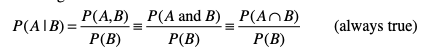

In [20]:
alt.Chart(df_county).mark_bar().encode(
    alt.X("percent_black_enrolled_preschool:Q", bin=alt.Bin(extent=[0, 4], step=0.5),axis=alt.Axis(format='%')),
    y='count()',
).properties(title=['Distribution of percent of Black Students Enrolled in Preschool',"Note that values are not reasonable due to poor assumptions"])


alt.Chart(...)

In [21]:
columns_to_drop = ['GEO_ID', 'median_family_income_white_not_hisp', 'percent_white_enrolled_preschool',
'percent_black_enrolled_preschool', 'percent_asian_enrolled_preschool', 'percent_hispanic_enrolled_preschool', 'under_18']
df_county.drop(columns = columns_to_drop, inplace=True)


### Create CSV Files

In [22]:

us_tract_df.to_csv(f'{data_path}/interim/us_tract_acs.csv', index=False)
df_county.to_csv(f'{data_path}/interim/us_county_acs.csv', index=False)
voting_population.to_csv(f'{data_path}/interim/voting_population_2020_acs.csv', index=False)

In [23]:
df_county.T


0     \
name                                  Autauga County, Alabama   
population                                            55380.0   
white                                                0.767913   
black                                                0.190285   
native_american                                      0.002528   
asian                                                0.010347   
hawaiian                                             0.000469   
some_other_race_alone                                0.006826   
two_more_races                                       0.021632   
hispanic_or_latino                                   0.028259   
state                                                      01   
county                                                    001   
median_family_income                                  71103.0   
income_20_percentile                                  21425.0   
income_80_percentile                                 109062.0   
median_family_income_white                            77875.0   
median_family_income_black                            39524.0   
median_family_income_indigenous                           NaN   
median_family_income_asian                            95774.0   
median_family_income_hispanic                        107656.0   
preschool_enrollment_white                           0.738683   
preschool_enrollment_black                           0.228395   
preschool_enrollment_hispanic                         0.04321   
preschool_enrollment_indigenous                           0.0   
preschool_enrollment_asian                                0.0   
all_in_poverty                                         8340.0   
year                                                     2019   
poverty_ratio_below_1_people                         0.151852   
public_students_pre_12                                 8859.0   
white_employed_16_64                                 0.680656   
black_employed_16_64                                  0.60367   
american_indian_employed_16_64                       0.821782   
asian_employed_16_64                                 0.654462   
some_other_race_alone_employed_16_64                 0.850394   
two_or_more_race_employed_16_64                      0.521605   
hispanic_or_latino_employed_16_64                    0.825296   
employed_25_54_population                            0.729885   
employed_16_64_population                            0.663667   
preschool_enroll                                     0.262213   
white_under_5                                        0.745415   
black_under_5                                        0.211066   
indigenous_under_5                                   0.011501   
asian_under_5                                             0.0   
hispanic_under_5                                     0.048803   
two_or_more_race_under_5                             0.026733   
some_other_race_under_5                              0.005284   

                                                         1     \
name                                  Baldwin County, Alabama   
population                                           212830.0   
white                                                0.862054   
black                                                0.092647   
native_american                                      0.007729   
asian                                                0.009252   
hawaiian                                             0.000042   
some_other_race_alone                                0.011413   
two_more_races                                       0.016863   
hispanic_or_latino                                   0.045628   
state                                                      01   
county                                                    003   
median_family_income                                  75850.0   
income_20_percentile                                  26666.0   
income_80_percentile      

Since we weren't able to calculate the preschool enrollment by race, we'd like to display this data in a way that allows users to understand disparities in access to preschool by race. 

In [24]:

  
test_df = df_county[df_county['name']=='Lamoille County, Vermont']

under_5 = ['white_under_5',	'black_under_5',	'indigenous_under_5',	'asian_under_5',	'hispanic_under_5']
preschool_enroll = ['preschool_enrollment_white','preschool_enrollment_black','preschool_enrollment_indigenous','preschool_enrollment_asian', 'preschool_enrollment_hispanic',]

df_county.sample(5)

name  population     white     black  \
2164  Jefferson County, Oklahoma      6158.0  0.848327  0.013803   
964       Rawlins County, Kansas      2502.0  0.924061  0.006395   
117     Calhoun County, Arkansas      5192.0  0.762134  0.216680   
1792   Sussex County, New Jersey    141483.0  0.928027  0.023254   
1032    Garrard County, Kentucky     17445.0  0.959301  0.019375   

      native_american     asian  hawaiian  some_other_race_alone  \
2164         0.058136  0.000162  0.000000               0.031341   
964          0.008393  0.001199  0.000000               0.043965   
117          0.001733  0.000000  0.003082               0.001733   
1792         0.000262  0.020942  0.000269               0.009570   
1032         0.001548  0.002580  0.000000               0.002408   

      two_more_races  hispanic_or_latino  ... employed_25_54_population  \
2164        0.048230            0.105716  ...                  0.657184   
964         0.015987            0.071942  ...                  0.856051   
117         0.014638            0.039869  ...                  0.653341   
1792        0.017677            0.082109  ...                  0.827237   
1032        0.014789            0.022184  ...                  0.762866   

     employed_16_64_population  preschool_enroll  white_under_5  \
2164                  0.559967          0.505618       0.846914   
964                   0.770803          0.622222       0.992857   
117                   0.588362          0.616438       0.739300   
1792                  0.755974          0.604158       0.922444   
1032                  0.650181          0.172691       0.952477   

      black_under_5  indigenous_under_5  asian_under_5  hispanic_under_5  \
2164       0.000000            0.054321       0.000000          0.165432   
964        0.000000            0.000000       0.000000          0.121429   
117        0.163424            0.000000       0.000000          0.097276   
1792       0.018519            0.000000       0.013295          0.126939   
1032       0.000000            0.000000       0.000000          0.046512   

      two_or_more_race_under_5  some_other_race_under_5  
2164                  0.079012                 0.019753  
964                   0.007143                 0.000000  
117                   0.097276                 0.000000  
1792                  0.030706                 0.010605  
1032                  0.047523                 0.000000  

[5 rows x 46 columns]

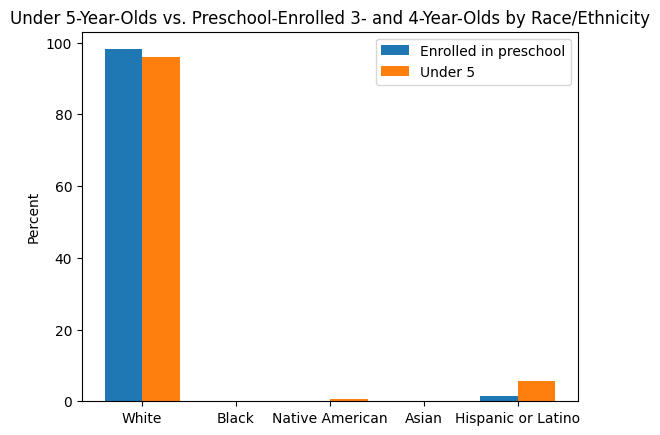

In [25]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick
  
under_5 = ['white_under_5',	'black_under_5',	'indigenous_under_5',	'asian_under_5',	'hispanic_under_5']
preschool_enroll = ['preschool_enrollment_white','preschool_enrollment_black','preschool_enrollment_indigenous','preschool_enrollment_asian', 'preschool_enrollment_hispanic',]

X = ['White','Black','Native American','Asian','Hispanic or Latino']
preschool=[]
under5=[]

for num in range(len(X)):
  preschool.append(test_df[preschool_enroll[num]].iloc[0]*100)
  under5.append(test_df[under_5[num]].iloc[0]*100)

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, preschool, 0.4, label = 'Enrolled in preschool')
plt.bar(X_axis + 0.2, under5, 0.4, label = 'Under 5')
  
plt.xticks(X_axis, X)
plt.xlabel("")
plt.ylabel("Percent")

plt.title("Under 5-Year-Olds vs. Preschool-Enrolled 3- and 4-Year-Olds by Race/Ethnicity")
plt.legend()
plt.show()

In [26]:
import plotly.express as px

print(px.colors.sequential.Blues_r)

['rgb(8,48,107)', 'rgb(8,81,156)', 'rgb(33,113,181)', 'rgb(66,146,198)', 'rgb(107,174,214)', 'rgb(158,202,225)', 'rgb(198,219,239)', 'rgb(222,235,247)', 'rgb(247,251,255)']


In [27]:
df_county.columns

Index(['name', 'population', 'white', 'black', 'native_american', 'asian',
       'hawaiian', 'some_other_race_alone', 'two_more_races',
       'hispanic_or_latino', 'state', 'county', 'median_family_income',
       'income_20_percentile', 'income_80_percentile',
       'median_family_income_white', 'median_family_income_black',
       'median_family_income_indigenous', 'median_family_income_asian',
       'median_family_income_hispanic', 'preschool_enrollment_white',
       'preschool_enrollment_black', 'preschool_enrollment_hispanic',
       'preschool_enrollment_indigenous', 'preschool_enrollment_asian',
       'all_in_poverty', 'year', 'poverty_ratio_below_1_people',
       'public_students_pre_12', 'white_employed_16_64',
       'black_employed_16_64', 'american_indian_employed_16_64',
       'asian_employed_16_64', 'some_other_race_alone_employed_16_64',
       'two_or_more_race_employed_16_64', 'hispanic_or_latino_employed_16_64',
       'employed_25_54_population', 'employed_16

In [28]:
test_df['preschool_enrollment_white'].iloc[0]

0.9813432835820896

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=96aa4e71-9142-4f1e-8c2a-54e13d3b1860' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>